Decision Tree Classifier to predict whether a customer will purchase a product or service based on demographic and behavioural data.UCI Machine Learning Bank Marketing dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/bank.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.shape

(4521, 17)

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Data Analysis
1. Missing Values
2. Explore about Numerical Variables
3. Explore Categorical Variables
4. Finding Relationships between features

<Axes: >

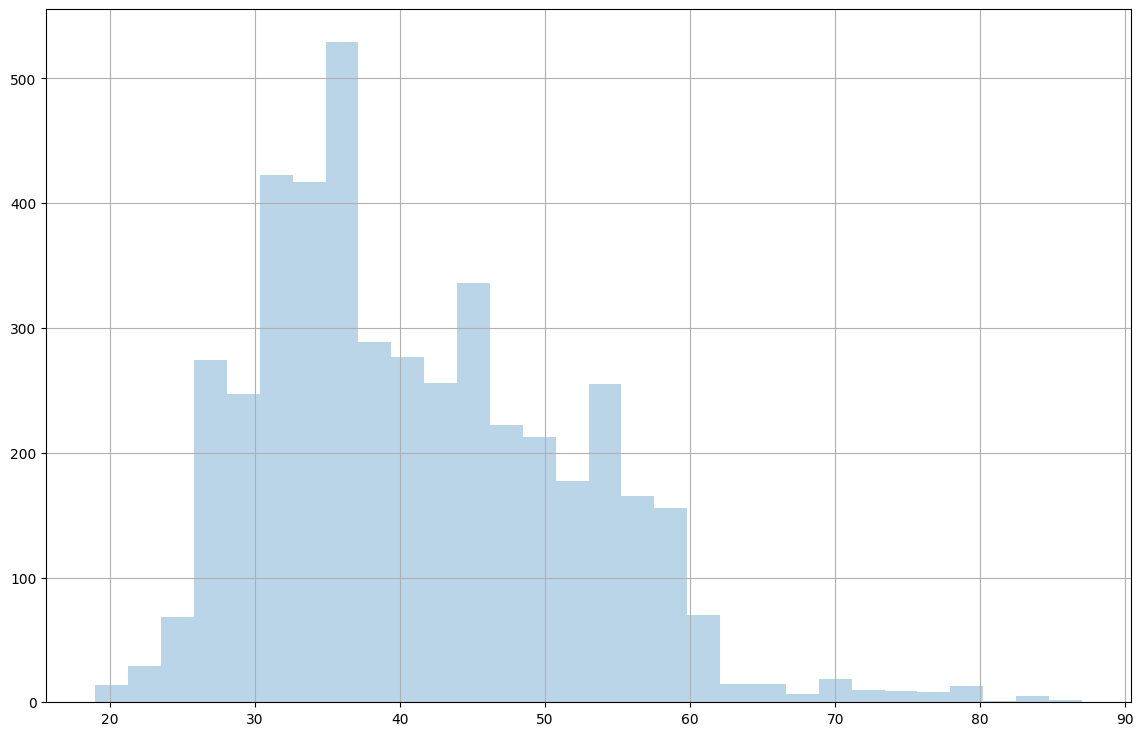

In [ ]:
df['age'].hist(bins=30,alpha=0.3)

Observation: Majority of the people are between 30-40 age group.

In [ ]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [ ]:
job_name=df.job.value_counts().index
job_name

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

In [ ]:
job_values=df.job.value_counts().values
job_values

array([969, 946, 768, 478, 417, 230, 183, 168, 128, 112,  84,  38])

([<matplotlib.patches.Wedge at 0x786ce3b04970>,
 [Text(0.8599124860367473, 0.6859668478564406, 'management'),
  Text(-0.46181823477844325, 0.998360615221836, 'blue-collar'),
  Text(-1.098425757085865, -0.05882904189551264, 'technician'),
  Text(-0.6669813594353691, -0.8747204502958343, 'admin.'),
  Text(-0.03248131193112514, -1.0995203337707007, 'services'),
  Text(0.4485971057488261, -1.0043707665567416, 'retired'),
  Text(0.7145526922445377, -0.8363100202712408, 'self-employed'),
  Text(0.8953679963036197, -0.6389962059318047, 'entrepreneur'),
  Text(1.007002905168999, -0.44265692017768793, 'unemployed'),
  Text(1.0665129073294892, -0.26935147762653994, 'housemaid'),
  Text(1.0932081849950825, -0.122048614329526, 'student'),
  Text(1.0996165268499798, -0.02904296607420854, 'unknown')],
 [Text(0.4690431742018621, 0.3741637351944221, '21.4%'),
  Text(-0.25190085533369627, 0.5445603355755468, '20.9%'),
  Text(-0.5991413220468355, -0.03208856830664326, '17.0%'),
  Text(-0.363808014237474

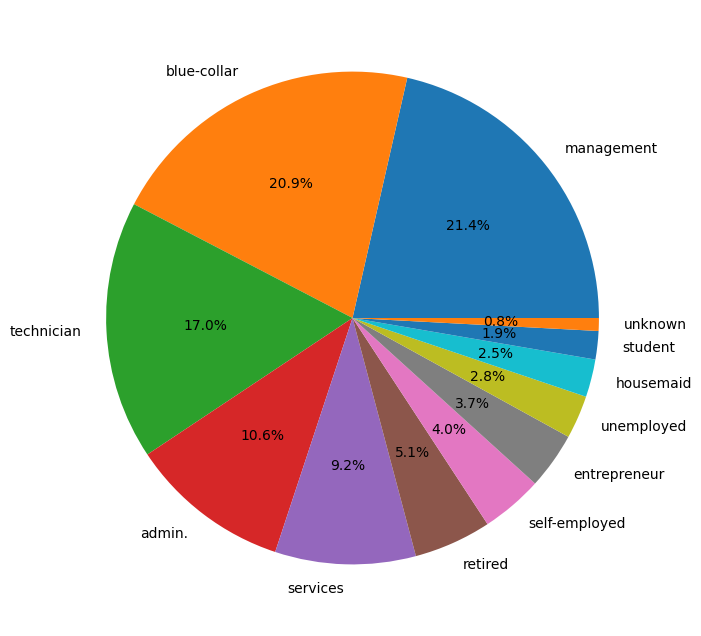

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(job_values,labels=job_name,autopct='%1.1f%%')

<Axes: xlabel='job', ylabel='count'>

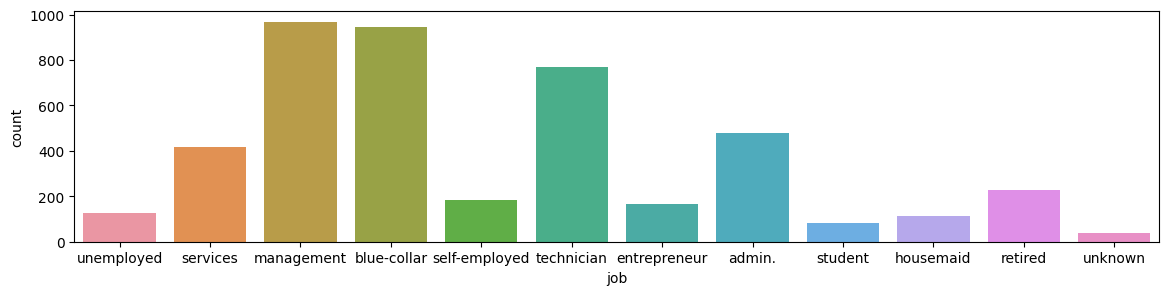

In [ ]:
plt.figure(figsize=(14,3))
sns.countplot(x='job',data=df)

In [ ]:
df.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

([<matplotlib.patches.Wedge at 0x786ce3a1fd60>,
 [Text(-0.40065506308889415, 1.0244391248001192, 'married'),
  Text(0.006497153578329398, -1.0999808121032748, 'single'),
  Text(1.0267877161499914, -0.3945972452558238, 'divorced')],
 [Text(-0.21853912532121497, 0.5587849771637013, '61.9%'),
  Text(0.0035439019518160348, -0.5999895338745135, '26.5%'),
  Text(0.5600660269909044, -0.21523486104863113, '11.7%')])

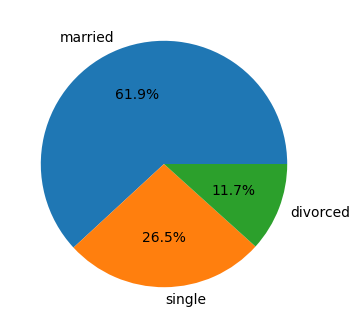

In [ ]:
marital_status=df.marital.value_counts().index
ms_values=df.marital.value_counts().values
plt.figure(figsize=(10,4))
plt.pie(ms_values,labels=marital_status,autopct='%1.1f%%')

Observation: Maximum people are married

In [ ]:
df.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

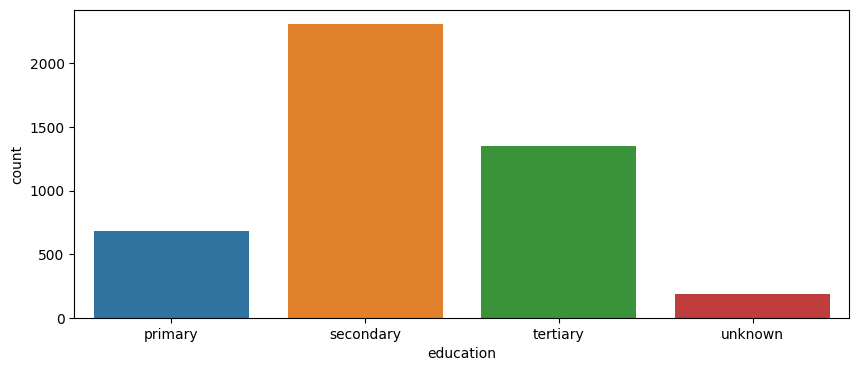

In [ ]:
education_status=df.education.value_counts().index
education_values=df.education.value_counts().values
plt.figure(figsize=(10,4))
sns.countplot(x='education',data=df)

Observation: Most of the people have atleast secondary education

In [ ]:
df.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='count'>

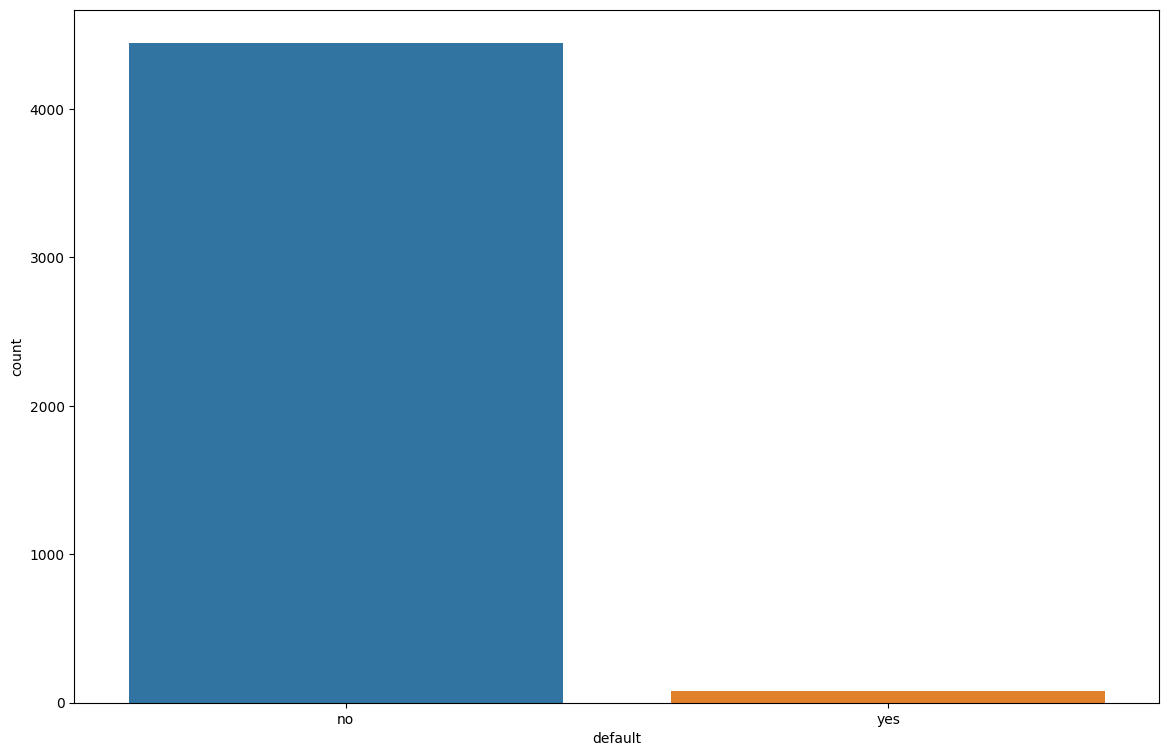

In [ ]:
sns.countplot(x='default',data=df)

Observation: Most of the people do not have any credit in default.There is a very small amount of population having credits in default.

In [ ]:
df.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

([<matplotlib.patches.Wedge at 0x786ce395ce20>,
 [Text(-0.2265340801705853, 1.076421065625003, 'yes'),
  Text(0.22653397938877062, -1.0764210868346495, 'no')],
 [Text(-0.12356404372941014, 0.5871387630681835, '56.6%'),
  Text(0.12356398875751123, -0.5871387746370815, '43.4%')])

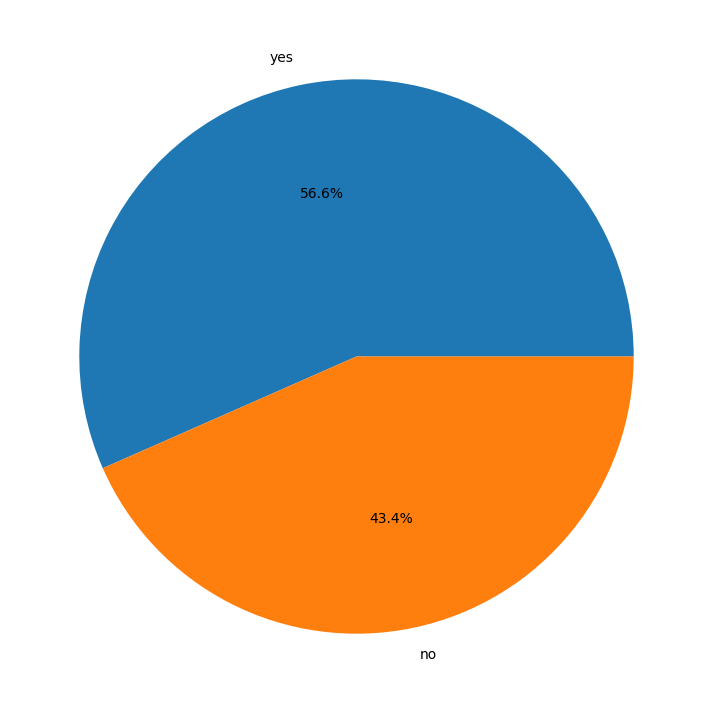

In [ ]:
hl_status=df.housing.value_counts().index
hl_values=df.housing.value_counts().values
plt.pie(hl_values,labels=hl_status,autopct='%1.1f%%')

Observation: 56% of the population has housing loans

In [ ]:
df.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

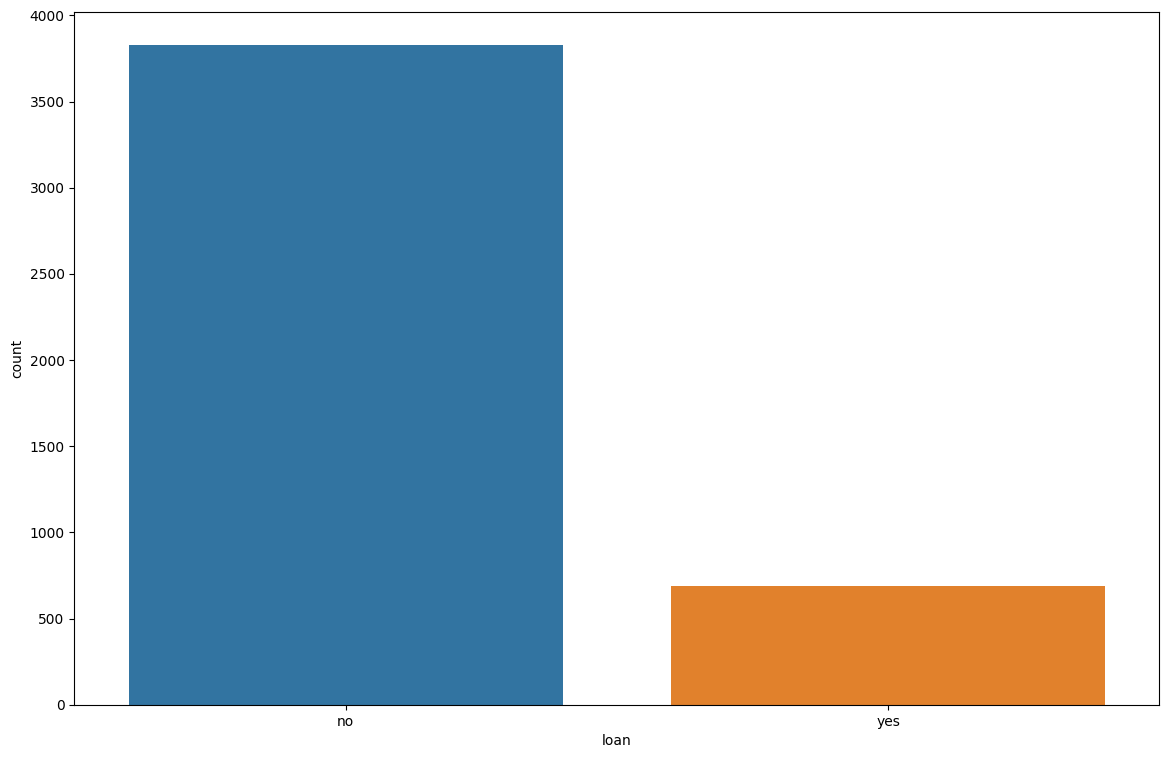

In [ ]:
sns.countplot(x='loan',data=df)

Observation: A big amount of population do not have any personal loans.

In [ ]:
df.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

([<matplotlib.patches.Wedge at 0x786ce3806530>,
 [Text(-0.4701269989067236, 0.994475039857189, 'cellular'),
  Text(0.25338808438858434, -1.070417899088895, 'unknown'),
  Text(1.0760258589911058, -0.2284039202431802, 'telephone')],
 [Text(-0.25643290849457645, 0.5424409308311939, '64.1%'),
  Text(0.13821168239377327, -0.5838643085939427, '29.3%'),
  Text(0.5869231958133304, -0.1245839564962801, '6.7%')])

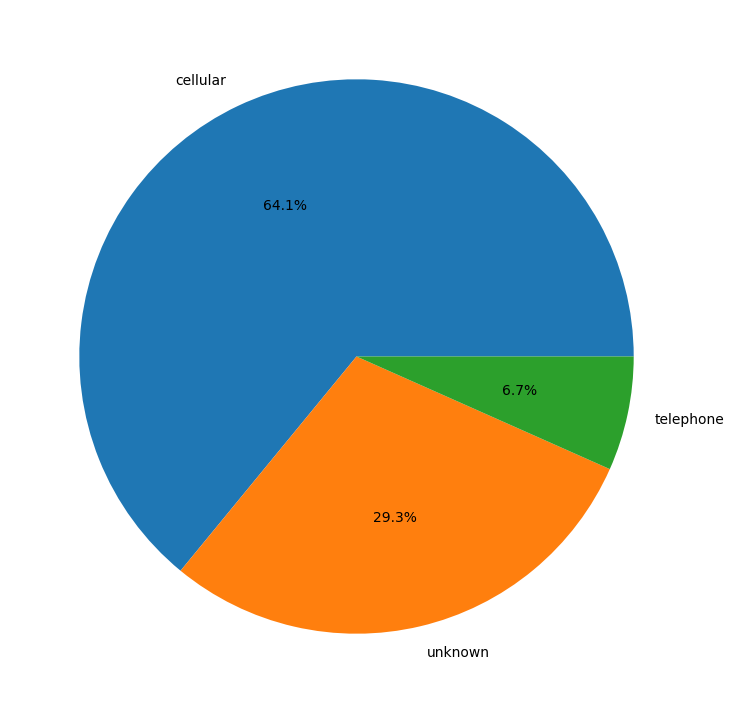

In [ ]:
c_status=df.contact.value_counts().index
c_values=df.contact.value_counts().values
plt.pie(c_values,labels=c_status,autopct='%1.1f%%')

Observations: 64% of the population can be contacted through cellphones.

In [ ]:
df.campaign.value_counts()

1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
19       3
20       3
28       3
24       3
32       2
21       2
23       2
22       2
31       1
29       1
50       1
30       1
44       1
Name: campaign, dtype: int64

<Axes: xlabel='campaign', ylabel='count'>

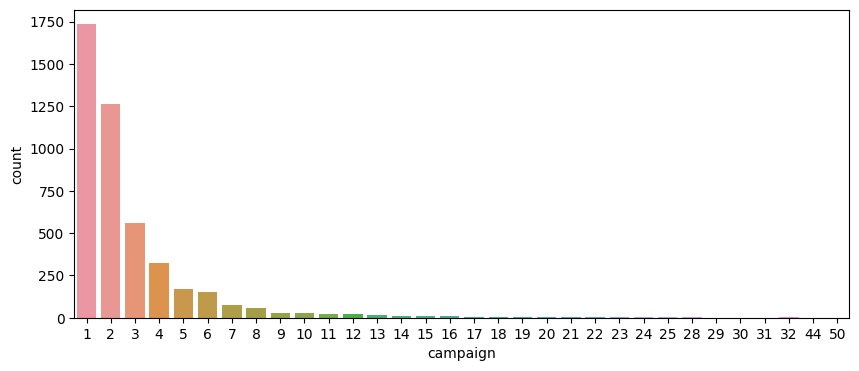

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='campaign',data=df)

Observation:The above plot shows the number of contacts performed during this campaign and for client

In [ ]:
df.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

([<matplotlib.patches.Wedge at 0x786ce3e39930>,
 [Text(-0.9278503803143381, 0.5908414946079349, 'unknown'),
  Text(0.7714408313696778, -0.7841422343527101, 'failure'),
  Text(1.0454750787880327, -0.342026109578139, 'other'),
  Text(1.0955834706556258, -0.09847262983273, 'success')],
 [Text(-0.5061002074441844, 0.32227717887705537, '82.0%'),
  Text(0.4207859080198242, -0.42771394601056917, '10.8%'),
  Text(0.5702591338843813, -0.18655969613353035, '4.4%'),
  Text(0.5975909839939776, -0.05371234354512545, '2.9%')])

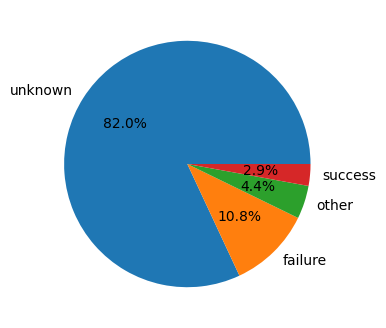

In [ ]:
outcome_status=df.poutcome.value_counts().index
outcome_values=df.poutcome.value_counts().values
plt.figure(figsize=(10,4))
plt.pie(outcome_values,labels=outcome_status,autopct='%1.1f%%')

Observation: It can be analyzed that the outcomes of the previous campaign were not so good,with very little success rate

In [ ]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

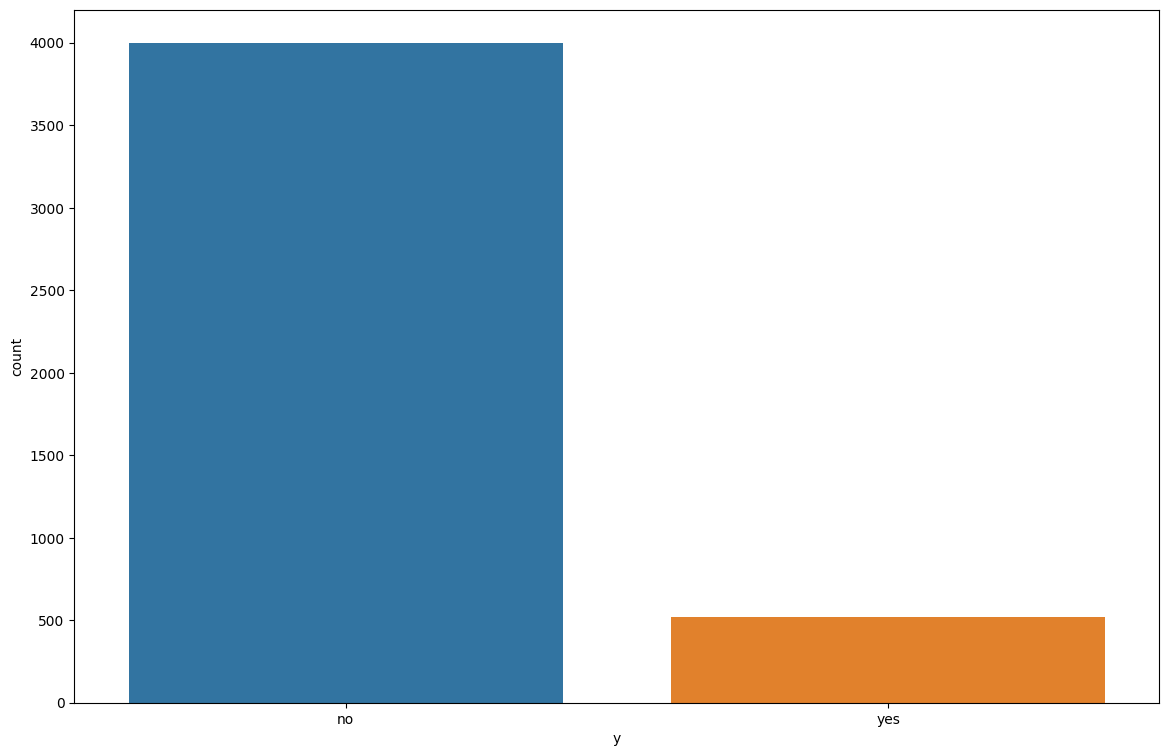

In [ ]:
sns.countplot(x='y',data=df)

Observation: We can analyze that most of the clients did not subscribe a term deposit,or in simple words,did not buy the product or service

In [ ]:
df.replace({'housing':{'no':0,'yes':1}},inplace=True)
df.replace({'loan':{'no':0,'yes':1}},inplace=True)

In [ ]:
df['h_and_l']=0
df['no_loan']=0

In [ ]:
df['h_and_l']=df['loan']+df['housing']
df['h_and_l']=df['h_and_l']==2

In [ ]:
df['no_loan']=df['loan']+df['housing']
df['no_loan']=df['no_loan']==0

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,h_and_l,no_loan
0,30,unemployed,married,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no,False,True
1,33,services,married,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no,True,False
2,35,management,single,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no,False,False
3,30,management,married,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no,True,False
4,59,blue-collar,married,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no,False,False
4517,57,self-employed,married,tertiary,yes,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no,True,False
4518,57,technician,married,secondary,no,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no,False,True
4519,28,blue-collar,married,secondary,no,1137,0,0,cellular,6,feb,129,4,211,3,other,no,False,True


In [ ]:
df.h_and_l.value_counts()

False    4115
True      406
Name: h_and_l, dtype: int64

([<matplotlib.patches.Wedge at 0x786ce361ab00>,
 [Text(-1.0565126311717568, 0.3062369347001298, 'False'),
  Text(1.0565126168357701, -0.3062369841590548, 'True')],
 [Text(-0.5762796170027764, 0.1670383280182526, '91.0%'),
  Text(0.5762796091831474, -0.16703835499584804, '9.0%')])

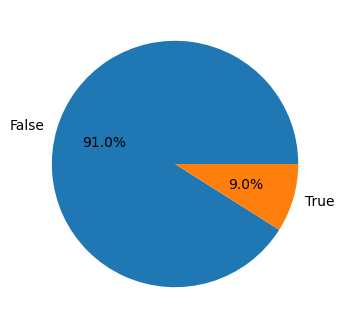

In [ ]:
handl_status=df.h_and_l.value_counts().index
handl_values=df.h_and_l.value_counts().values
plt.figure(figsize=(10,4))
plt.pie(handl_values,labels=handl_status,autopct='%1.1f%%')

Observation : Only 9% of the population has both housing and personal loans

In [ ]:
df.no_loan.value_counts()

False    2844
True     1677
Name: no_loan, dtype: int64

([<matplotlib.patches.Wedge at 0x786ce366dbd0>,
 [Text(-0.4338934512969233, 1.0108098104597347, 'False'),
  Text(0.4338934512969229, -1.0108098104597347, 'True')],
 [Text(-0.23666915525286722, 0.5513508057053097, '62.9%'),
  Text(0.23666915525286703, -0.5513508057053098, '37.1%')])

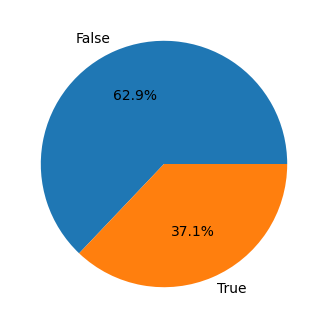

In [ ]:
no_status=df.no_loan.value_counts().index
no_values=df.no_loan.value_counts().values
plt.figure(figsize=(10,4))
plt.pie(no_values,labels=no_status,autopct='%1.1f%%')

Observation: 37% of the population do not have any kind of loans.

In [ ]:
df.replace({'marital':{'single':0,'divorced':1,'married':2}},inplace=True)
df.replace({'education':{'unknown':0,'primary':1,'secondary':2,'tertiary':3}},inplace=True)
df.replace({'default':{'no':0,'yes':1}},inplace=True)
df.replace({'contact':{'unknown':0,'telephone':1,'cellular':2}},inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['age']=le.fit_transform(df['age'])
df['month']=le.fit_transform(df['month'])

In [ ]:
X=df.drop(['pdays','previous','poutcome','no_loan','h_and_l','y'],axis=1)
Y=df['y']

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,11,10,2,1,0,1787,0,0,2,19,10,79,1
1,14,7,2,2,0,4789,1,1,2,11,8,220,1
2,16,4,0,3,0,1350,1,0,2,16,0,185,1
3,11,4,2,3,0,1476,1,1,0,3,6,199,4
4,40,1,2,2,0,0,1,0,0,5,8,226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,2,2,0,-333,1,0,2,30,5,329,5
4517,38,6,2,3,1,-3313,1,1,0,9,8,153,1
4518,38,9,2,2,0,295,0,0,2,19,1,151,11
4519,9,1,2,2,0,1137,0,0,2,6,3,129,4


In [ ]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

Splitting the data into training data & Test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
print(X.shape,X_train.shape, X_test.shape)

(4521, 13) (3164, 13) (1357, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[['age','balance','day','duration']]=sc.fit_transform(X_train[['age','balance','day','duration']])
X_test[['age','balance','day','duration']]=sc.fit_transform(X_test[['age','balance','day','duration']])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,random_state=2529)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=2529)

In [ ]:
Y_pred=dt.predict(X_test)
Y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[1180,   22],
       [ 125,   30]])

In [ ]:
accuracy_score(Y_test,Y_pred)

0.8916728076639646

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      1202
         yes       0.58      0.19      0.29       155

    accuracy                           0.89      1357
   macro avg       0.74      0.59      0.62      1357
weighted avg       0.87      0.89      0.87      1357

